# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

**1. Загрузить датасет**

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('creditcard.csv')

Time Number of seconds elapsed between this transaction and the first transaction in the dataset

V1 may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

AmountTransaction amount

Class 1 for fraudulent transactions, 0 otherwise

In [88]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Отсутствующих значений нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [24]:
print('Количество честных сделок:', len(df[df['Class'] == 0]))
print('Количество обманных сделок:', len(df[df['Class'] == 1]))
print('Процент обманных сделок в датасете:', (len(df[df['Class'] == 1]) * 100 / len(df['Class'])))

Количество честных сделок: 284315
Количество обманных сделок: 492
Процент обманных сделок в датасете: 0.1727485630620034


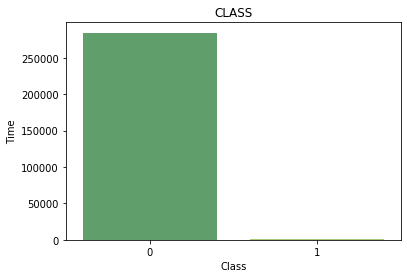

In [27]:
grouped_classes=df.groupby('Class').count().reset_index()
grouped_classes
plt.title('CLASS')
sns.barplot(x='Class',y='Time', data=grouped_classes, palette='summer')
plt.show()

Мошеннических сделок значительно меньше (0,17%), чем честных сделок.

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

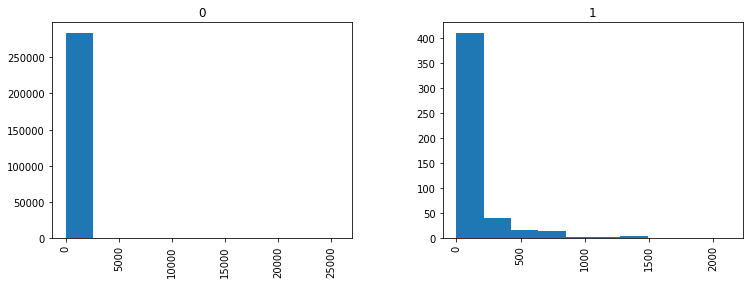

In [50]:
amount_hist = df.hist(column = 'Amount', by = "Class")

fig = plt.gcf()
fig.set_size_inches(12,4)

plt.show()

In [5]:
df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

In [67]:
len(df_0), len(df_1)

(284315, 492)

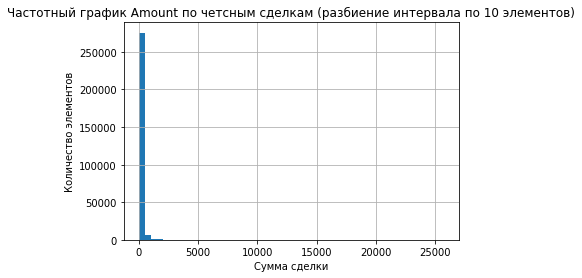

In [76]:
plt.hist(df_0['Amount'], 50)
plt.xlabel('Сумма сделки')
plt.ylabel('Количество элементов')
plt.title('Частотный график Amount по четсным сделкам (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

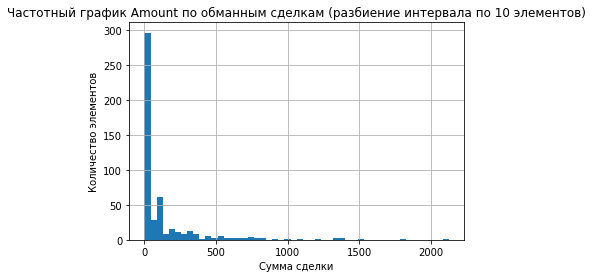

In [77]:
plt.hist(df_1['Amount'], 50)
plt.xlabel('Сумма сделки')
plt.ylabel('Количество элементов')
plt.title('Частотный график Amount по обманным сделкам (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [55]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [57]:
df.groupby('Class').sum()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,2.696392e+10,2347.798633,-1782.898826,3460.374276,-2234.678319,1550.402644,687.686462,2739.815693,-280.75286,1269.912477,...,-183.181143,-351.08547,-6.91205,19.831519,51.72411,-20.392853,-25.410878,-83.922798,-37.228307,2.510246e+07
1,3.972743e+07,-2347.798633,1782.898826,-3460.374276,2234.678319,-1550.402644,-687.686462,-2739.815693,280.75286,-1269.912477,...,183.181143,351.08547,6.91205,-19.831519,-51.72411,20.392853,25.410878,83.922798,37.228307,6.012797e+04


Из графиков видно, использовано денег в обманных операциях много меньше, чем в честных сделках. Но причиной этому может быть малое количество обманных сделок по сравнению с честными. При этом средняя сумма сделки обманной выше средней суммы сделки честной. 

**5. Построить графики histograms для всех значений**

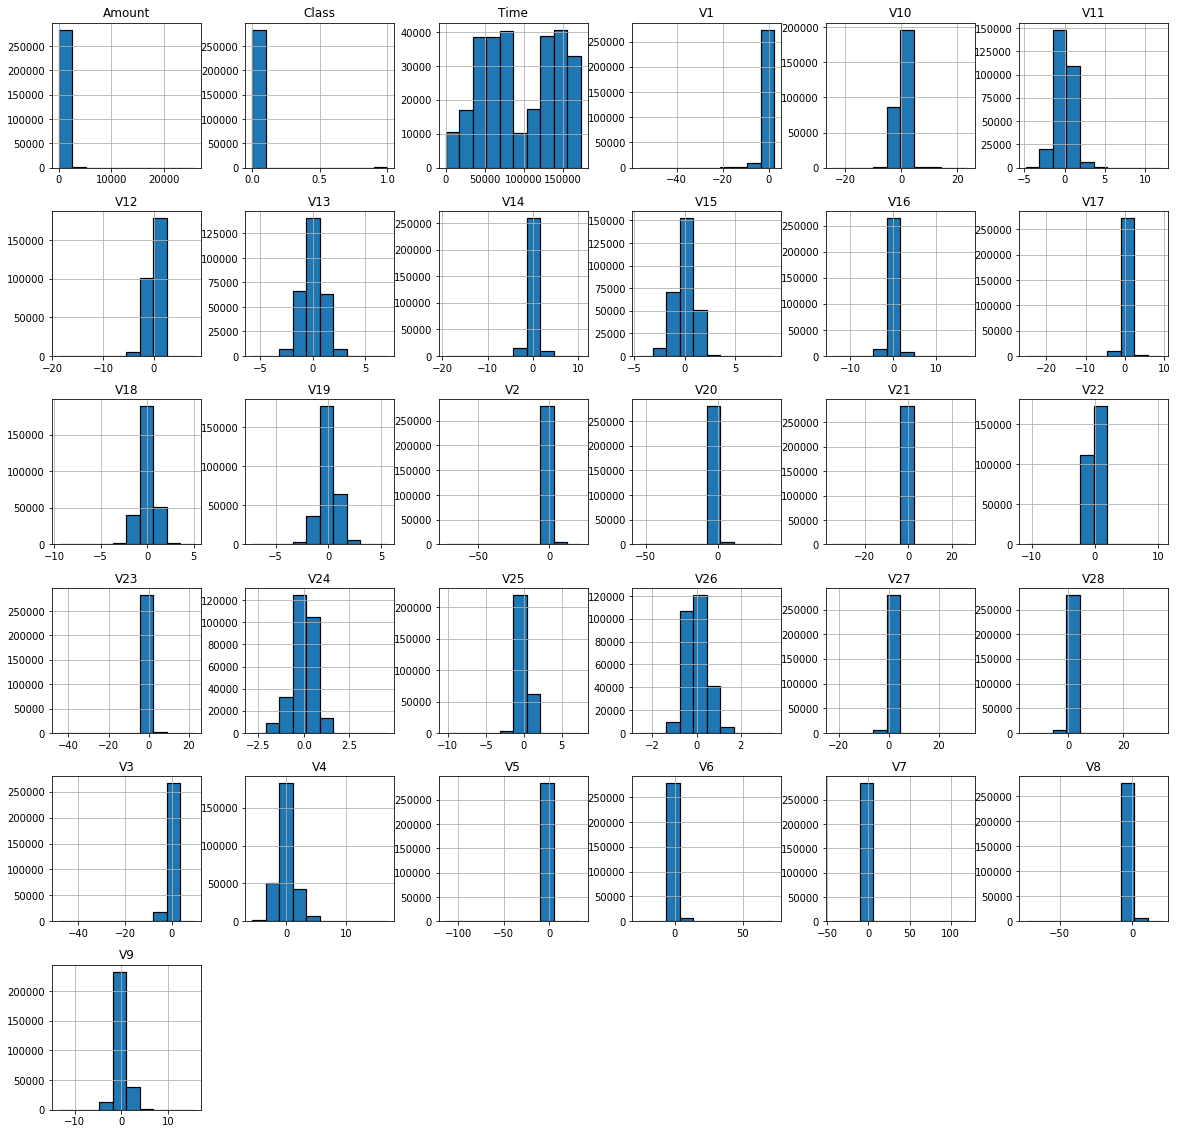

In [82]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

**6. Построить матрицу корреляций для всех значений**

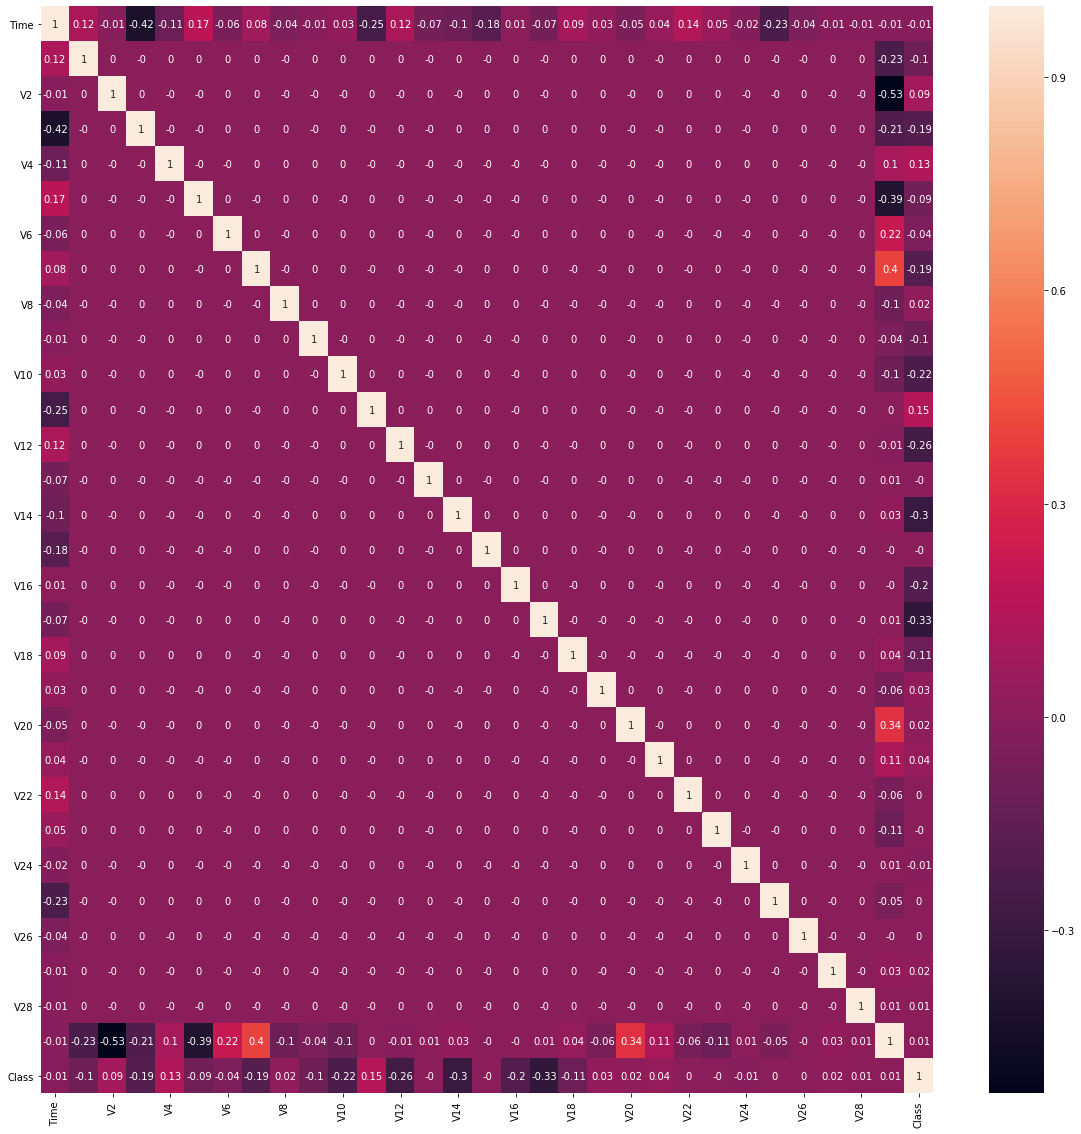

In [86]:
correlation_matrix = df.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Сильно коррелирующих между собой значений не наблюдаем. Есть много практически некоррелирующих между собой признаков.

**7.  Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [90]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Выбиарем следующие признаки (наиболее коррелирующие с таргетом): 'V3', 'V6', 'V10', 'V11', 'V12', 'V17'

In [178]:
df_drop = df[['V3','V6','V10','V11','V12','V17','Class']]
df_drop.head()

,V3,V6,V10,V11,V12,V17,Class
0,2.536347,0.462388,0.090794,-0.551600,-0.617801,0.207971,0
1,0.166480,-0.082361,-0.166974,1.612727,1.065235,-0.114805,0
2,1.773209,1.800499,0.207643,0.624501,0.066084,1.109969,0
3,1.792993,1.247203,-0.054952,-0.226487,0.178228,-0.684093,0
4,1.548718,0.095921,0.753074,-0.822843,0.538196,-0.237033,0


Но я возьму все признаки, т.е. датасет df.

In [6]:
X = df.drop('Class', axis=1)
y = df.Class
type(y)

pandas.core.series.Series

In [7]:
# разделим полученный датасет на тренировочный 80% и тестовый 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.74      0.56      0.64       101

    accuracy                           1.00     56962
   macro avg       0.87      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962



Опасная транзакция м.б. обнаружена в 74% случаев (положительное правильное решение). Модель нашла только 56% опасных транзакций - полнота данных 56%. 

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистическую регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

Элементов Class в выборке - 492. 

In [10]:
df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]
from sklearn.utils import resample

In [11]:
class_0 = resample(df_0, replace = False, n_samples = len(df_1),random_state = 0) 

In [223]:
class_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 232273 to 7214
Data columns (total 31 columns):
Time      492 non-null float64
V1        492 non-null float64
V2        492 non-null float64
V3        492 non-null float64
V4        492 non-null float64
V5        492 non-null float64
V6        492 non-null float64
V7        492 non-null float64
V8        492 non-null float64
V9        492 non-null float64
V10       492 non-null float64
V11       492 non-null float64
V12       492 non-null float64
V13       492 non-null float64
V14       492 non-null float64
V15       492 non-null float64
V16       492 non-null float64
V17       492 non-null float64
V18       492 non-null float64
V19       492 non-null float64
V20       492 non-null float64
V21       492 non-null float64
V22       492 non-null float64
V23       492 non-null float64
V24       492 non-null float64
V25       492 non-null float64
V26       492 non-null float64
V27       492 non-null float64
V28       492 non-nul

In [12]:
# объединим полученные данные с меньшей выборкой
downsampled = pd.concat([class_0, df_1])

# проверим количество
downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [13]:
X_dwn = downsampled.drop('Class', axis=1)
y_dwn = downsampled.Class

In [14]:
# разделим полученный датасет на тренировочный 80% и тестовый 20%
X_train_dwn,X_test_dwn,y_train_dwn,y_test_dwn = train_test_split(X_dwn, y_dwn, test_size = 0.2, random_state = 0)

In [15]:
model_dwn = LogisticRegression()
model_dwn.fit(X_train_dwn, y_train_dwn)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
pred_dwn = model_dwn.predict(X_test_dwn)
print(classification_report(y_test_dwn, pred_dwn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        91
           1       0.97      0.91      0.94       106

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



Опасная транзакция м.б. обнаружена в 97 %  случаев (положительное правильное решение). Модель нашла 91% опасных транзакций - полнота данных 91%.
Точность модели и ее полнота выше, чем в случае исопльзования несбалансированной выборки.

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
# разделим первоначальный (несбалансированный) датасет на тренировочный 80% и тестовый 20% (из п.7)
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# создаем модель деревья решений
model_rf=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_rf.fit(X_train_rf,y_train_rf)

headers = list(X_train_rf.columns.values)

feature_imp = pd.Series(model_rf.feature_importances_,index=headers).sort_values(ascending=False)


No handles with labels found to put in legend.


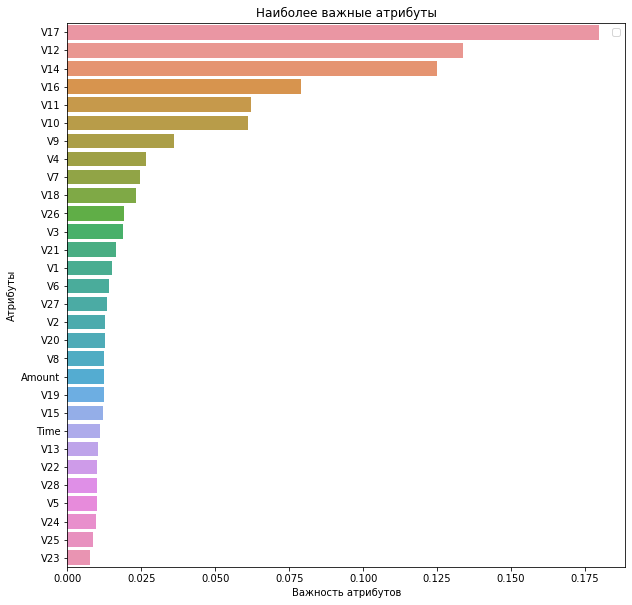

In [9]:

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [11]:
model_rf.score(X_test_rf, y_test_rf)

0.9995084442259752

Точность модели высокая 99,95 %.
В дальнейшем при работе с моделью можно огрничить количество атрибутов теми, которые вносят наибольшее влияние на модель (v17, v12, v14, v16)

Результат у модели, построенной с помощью случайного леса лучше, чем у модели, построенной на несбалансированных данных с помощью логистической регрессии, т.к. модель случайного леса основана на деревьях решений, которые инвариантны к несбалансированности данных.

Результат модели случайного леса незначительно выше результата модели логистической регресси на сбалансированных данных (2 класса). Чуть меньшая точность лог.модели можеть быть обусловена тем, что из-за балансировки объем обучающих данных был значительно обрезан, выборка стала много меньше.